### Deliverable 1: Preprocessing the Data for a Neural Network

Design a neural network model, taking into account any modifications
that will optimize the model to achieve higher than 75% accuracy.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
applType_count=application_df.APPLICATION_TYPE.value_counts()
applType_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

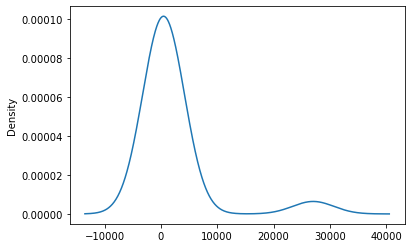

In [5]:
# Visualize the value counts of APPLICATION_TYPE
applType_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applType_count[applType_count < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classific_count=application_df.CLASSIFICATION.value_counts()
classific_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2570        1
C1820        1
C2150        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

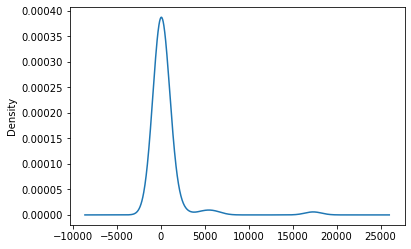

In [8]:
# Visualize the value counts of CLASSIFICATION
classific_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classific_count[classific_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)



In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### 1st trial

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="linear")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])


Epoch 1/200
804/804 [==============================] - 1s 707us/step - loss: 2.1394 - accuracy: 0.5413
Epoch 2/200
804/804 [==============================] - 1s 765us/step - loss: 1.0967 - accuracy: 0.6578
Epoch 3/200
804/804 [==============================] - 1s 748us/step - loss: 0.8411 - accuracy: 0.6867
Epoch 4/200
804/804 [==============================] - 1s 719us/step - loss: 0.6823 - accuracy: 0.6836
Epoch 5/200
774/804 [===========================>..] - ETA: 0s - loss: 0.6601 - accuracy: 0.7053
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 829us/step - loss: 0.6603 - accuracy: 0.7053
Epoch 6/200
804/804 [==============================] - 1s 952us/step - loss: 0.6640 - accuracy: 0.7023
Epoch 7/200
804/804 [==============================] - 1s 724us/step - loss: 0.6336 - accuracy: 0.7107
Epoch 8/200
804/804 [==============================] - 1s 705us/step - loss: 0.6480 - accuracy: 0.7093
Epoch 9/200
804/804 [=============

804/804 [==============================] - 1s 872us/step - loss: 0.5643 - accuracy: 0.7266
Epoch 64/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5728 - accuracy: 0.7266
Epoch 65/200
496/804 [=================>............] - ETA: 0s - loss: 0.5672 - accuracy: 0.7266
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5663 - accuracy: 0.7276
Epoch 66/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5666 - accuracy: 0.7296
Epoch 67/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5809 - accuracy: 0.7194
Epoch 68/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5664 - accuracy: 0.7296
Epoch 69/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5669 - accuracy: 0.7279
Epoch 70/200
504/804 [=================>............] - ETA: 0s - loss: 0.5600 - accuracy: 0.7358
Epoch 00070: saving model to checkpoints\weights.70.hdf5


252/804 [========>.....................] - ETA: 0s - loss: 0.5745 - accuracy: 0.7097
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 1s 681us/step - loss: 0.5699 - accuracy: 0.7205
Epoch 126/200
804/804 [==============================] - 1s 660us/step - loss: 0.5670 - accuracy: 0.7215
Epoch 127/200
804/804 [==============================] - 1s 821us/step - loss: 0.5630 - accuracy: 0.7285
Epoch 128/200
804/804 [==============================] - 1s 656us/step - loss: 0.5616 - accuracy: 0.7296
Epoch 129/200
804/804 [==============================] - 1s 661us/step - loss: 0.5536 - accuracy: 0.7321
Epoch 130/200
236/804 [=======>......................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7258
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 656us/step - loss: 0.5622 - accuracy: 0.7258
Epoch 131/200
804/804 [==============================] - 1s 641us/step - loss: 0.5624 - accuracy: 

804/804 [==============================] - 1s 686us/step - loss: 0.5545 - accuracy: 0.7280
Epoch 186/200
804/804 [==============================] - 1s 705us/step - loss: 0.5526 - accuracy: 0.72800s - loss: 0.546
Epoch 187/200
804/804 [==============================] - 1s 684us/step - loss: 0.5558 - accuracy: 0.7266
Epoch 188/200
804/804 [==============================] - 1s 631us/step - loss: 0.5538 - accuracy: 0.7272
Epoch 189/200
804/804 [==============================] - 1s 816us/step - loss: 0.5646 - accuracy: 0.7178
Epoch 190/200
  1/804 [..............................] - ETA: 1s - loss: 0.5535 - accuracy: 0.7812
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 799us/step - loss: 0.5550 - accuracy: 0.7255
Epoch 191/200
804/804 [==============================] - 1s 775us/step - loss: 0.5635 - accuracy: 0.7239
Epoch 192/200
804/804 [==============================] - 1s 878us/step - loss: 0.5534 - accuracy: 0.7295
Epoch 193/200
8

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5748 - accuracy: 0.7280
Loss: 0.57478928565979, Accuracy: 0.7280466556549072


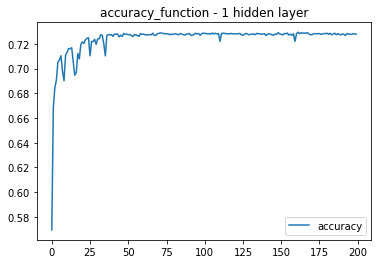

In [19]:
# Plot the train and test loss function
import matplotlib.pyplot as plt
plt.plot(fit_model.history["accuracy"])
plt.title("accuracy_function - 1 hidden layer")
plt.legend(["accuracy"])
plt.show()

### 2nd trial with Additional neurons and hidden layers

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model2 = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 1s 955us/step - loss: 0.6356 - accuracy: 0.6482
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5692 - accuracy: 0.7162
Epoch 3/200
804/804 [==============================] - 1s 705us/step - loss: 0.5636 - accuracy: 0.7172
Epoch 4/200
804/804 [==============================] - 1s 737us/step - loss: 0.5644 - accuracy: 0.7178
Epoch 5/200
750/804 [==========================>...] - ETA: 0s - loss: 0.5543 - accuracy: 0.7325
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 769us/step - loss: 0.5546 - accuracy: 0.7323
Epoch 6/200
804/804 [==============================] - 1s 734us/step - loss: 0.5582 - accuracy: 0.7295
Epoch 7/200
804/804 [==============================] - 1s 857us/step - loss: 0.5592 - accuracy: 0.7264
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7284
Epoch 9/200
804/804 [=================

804/804 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7312
Epoch 64/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7320
Epoch 65/200
521/804 [==================>...........] - ETA: 0s - loss: 0.5435 - accuracy: 0.7394
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5449 - accuracy: 0.7373
Epoch 66/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7293
Epoch 67/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7326
Epoch 68/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7341
Epoch 69/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7351
Epoch 70/200
508/804 [=================>............] - ETA: 0s - loss: 0.5484 - accuracy: 0.7314
Epoch 00070: saving model to checkpoints\weights.70.hdf5
80

277/804 [=========>....................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7430
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 1s 886us/step - loss: 0.5413 - accuracy: 0.7386
Epoch 126/200
804/804 [==============================] - 1s 998us/step - loss: 0.5501 - accuracy: 0.7312
Epoch 127/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7372
Epoch 128/200
804/804 [==============================] - 1s 748us/step - loss: 0.5462 - accuracy: 0.7317
Epoch 129/200
804/804 [==============================] - 1s 872us/step - loss: 0.5463 - accuracy: 0.7329
Epoch 130/200
281/804 [=========>....................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7318
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 947us/step - loss: 0.5482 - accuracy: 0.7339
Epoch 131/200
804/804 [==============================] - 1s 902us/step - loss: 0.5481 - accuracy: 0.

804/804 [==============================] - 1s 827us/step - loss: 0.5422 - accuracy: 0.7390
Epoch 187/200
804/804 [==============================] - 1s 817us/step - loss: 0.5407 - accuracy: 0.7386
Epoch 188/200
804/804 [==============================] - 1s 966us/step - loss: 0.5451 - accuracy: 0.7347
Epoch 189/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7341
Epoch 190/200
 39/804 [>.............................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7295
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7357
Epoch 191/200
804/804 [==============================] - 1s 925us/step - loss: 0.5447 - accuracy: 0.7356
Epoch 192/200
804/804 [==============================] - 1s 862us/step - loss: 0.5474 - accuracy: 0.7322
Epoch 193/200
804/804 [==============================] - 1s 867us/step - loss: 0.5475 - accuracy: 0.7338
Epoch 194/200
804/804 [============

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5572 - accuracy: 0.7357
Loss: 0.5572487115859985, Accuracy: 0.7357434630393982


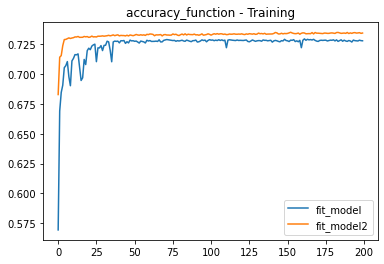

In [24]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2"])
plt.show()

### 3rd trial with Additional hidden layers and different activation fuction 

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model3 = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.6508 - accuracy: 0.6358
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5699 - accuracy: 0.7234
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5630 - accuracy: 0.7268
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5628 - accuracy: 0.7253
Epoch 5/200
781/804 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7271
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5597 - accuracy: 0.7271
Epoch 6/200
804/804 [==============================] - 1s 970us/step - loss: 0.5584 - accuracy: 0.7277
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7299
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7310
Epoch 9/200
804/804 [===========================

804/804 [==============================] - 1s 852us/step - loss: 0.5454 - accuracy: 0.7349
Epoch 64/200
804/804 [==============================] - 1s 861us/step - loss: 0.5481 - accuracy: 0.73490s - loss: 0.5
Epoch 65/200
495/804 [=================>............] - ETA: 0s - loss: 0.5473 - accuracy: 0.7307
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 935us/step - loss: 0.5474 - accuracy: 0.7316
Epoch 66/200
804/804 [==============================] - 1s 855us/step - loss: 0.5452 - accuracy: 0.7340
Epoch 67/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7336
Epoch 68/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5459 - accuracy: 0.7363
Epoch 69/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7309
Epoch 70/200
480/804 [================>.............] - ETA: 0s - loss: 0.5376 - accuracy: 0.7435
Epoch 00070: saving model to checkpoi

294/804 [=========>....................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7384
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 1s 872us/step - loss: 0.5467 - accuracy: 0.7366
Epoch 126/200
804/804 [==============================] - 1s 856us/step - loss: 0.5478 - accuracy: 0.7334
Epoch 127/200
804/804 [==============================] - 1s 902us/step - loss: 0.5415 - accuracy: 0.7377
Epoch 128/200
804/804 [==============================] - 1s 932us/step - loss: 0.5467 - accuracy: 0.7318
Epoch 129/200
804/804 [==============================] - 1s 843us/step - loss: 0.5417 - accuracy: 0.7389
Epoch 130/200
242/804 [========>.....................] - ETA: 0s - loss: 0.5531 - accuracy: 0.7293
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7317
Epoch 131/200
804/804 [==============================] - 1s 980us/step - loss: 0.5494 - accuracy: 0.

804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7399
Epoch 186/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7337
Epoch 187/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5428 - accuracy: 0.7360
Epoch 188/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7377
Epoch 189/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7334
Epoch 190/200
 38/804 [>.............................] - ETA: 1s - loss: 0.5661 - accuracy: 0.7230
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7367
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7366
Epoch 192/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7323
Epoch 193/200
804/804 [========================

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5546 - accuracy: 0.7355
Loss: 0.5545843243598938, Accuracy: 0.7355102300643921


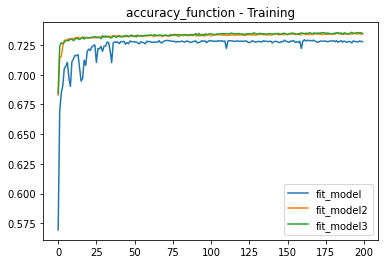

In [29]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.plot(fit_model3.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2", "fit_model3"])
plt.show()

### 4th trial with Data Preprocessing

In [30]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Get the descriptive statistics for ASK_AMT using .describe()
application_askATM_df = application_df["ASK_AMT"]
application_askATM_df.describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [32]:
# Data Preprocessing
# Establish the ASK_AMT bins and group names.
ASK_AMT_bins = [0, 5e+03, 1e+04, 5e+04, 1e+05, 5e+05, 1e+06, 5e+06, 1e+07, 5e+07, 1e+10]
application_askATM_df.groupby(pd.cut(application_askATM_df, ASK_AMT_bins)).count()


ASK_AMT
(0.0, 5000.0]                  25398
(5000.0, 10000.0]                549
(10000.0, 50000.0]              2398
(50000.0, 100000.0]             1423
(100000.0, 500000.0]            2304
(500000.0, 1000000.0]            650
(1000000.0, 5000000.0]           940
(5000000.0, 10000000.0]          225
(10000000.0, 50000000.0]         258
(50000000.0, 10000000000.0]      154
Name: ASK_AMT, dtype: int64

In [33]:
# Creat the ASK_AMT bins
group_names = ["0-5e+03", "5001-1e+04", "10001-5e+04", "50001-5e+05", "100001-5e+05","500001-1e+06", "1000001-5e+06", "5000001-1e+07", "10000001-5e+07",  ">=5000001" ]
# Categorize spending based on the ASK_AMT bins.
application_df["ASK_AMT_Ranges"] = pd.cut(application_askATM_df, ASK_AMT_bins, labels=group_names)
# Drop 'ASK_AMT' column
application_df = application_df.drop(["ASK_AMT"],1)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_Ranges
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0-5e+03
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100001-5e+05
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0-5e+03
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5001-1e+04
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100001-5e+05


In [34]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_Ranges
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0-5e+03
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100001-5e+05
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0-5e+03
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5001-1e+04
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100001-5e+05


In [35]:
application_df['ASK_AMT_Ranges'] = application_df['ASK_AMT_Ranges'].astype('str')
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
ASK_AMT_Ranges            object
dtype: object

In [36]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT_Ranges            10
dtype: int64

In [37]:
# Look at APPLICATION_TYPE value counts for binning
applType_count=application_df.APPLICATION_TYPE.value_counts()
applType_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [38]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applType_count[applType_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [39]:
# Look at CLASSIFICATION value counts for binning
classific_count=application_df.CLASSIFICATION.value_counts()
classific_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2570        1
C1820        1
C2150        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [40]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classific_count[classific_count < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [41]:
# Look at CLASSIFICATION value counts for binning
ASK_AMT_Ranges_count=application_df.ASK_AMT_Ranges.value_counts()
ASK_AMT_Ranges_count

0-5e+03           25398
10001-5e+04        2398
100001-5e+05       2304
50001-5e+05        1423
1000001-5e+06       940
500001-1e+06        650
5001-1e+04          549
10000001-5e+07      258
5000001-1e+07       225
>=5000001           154
Name: ASK_AMT_Ranges, dtype: int64

In [42]:
# Determine which values to replace if counts are less than ..?
replace_ASK_AMT_Ranges = list(ASK_AMT_Ranges_count[ASK_AMT_Ranges_count > 5000].index)

# Replace in dataframe
for atr in replace_ASK_AMT_Ranges:
    application_df.ASK_AMT_Ranges = application_df.ASK_AMT_Ranges.replace(atr,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT_Ranges.value_counts()

Other             25398
10001-5e+04        2398
100001-5e+05       2304
50001-5e+05        1423
1000001-5e+06       940
500001-1e+06        650
5001-1e+04          549
10000001-5e+07      258
5000001-1e+07       225
>=5000001           154
Name: ASK_AMT_Ranges, dtype: int64

In [43]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION             8
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT_Ranges            10
dtype: int64

In [44]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ASK_AMT_Ranges_10000001-5e+07,ASK_AMT_Ranges_1000001-5e+06,ASK_AMT_Ranges_100001-5e+05,ASK_AMT_Ranges_10001-5e+04,ASK_AMT_Ranges_5000001-1e+07,ASK_AMT_Ranges_500001-1e+06,ASK_AMT_Ranges_50001-5e+05,ASK_AMT_Ranges_5001-1e+04,ASK_AMT_Ranges_>=5000001,ASK_AMT_Ranges_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ASK_AMT_Ranges_10000001-5e+07,ASK_AMT_Ranges_1000001-5e+06,ASK_AMT_Ranges_100001-5e+05,ASK_AMT_Ranges_10001-5e+04,ASK_AMT_Ranges_5000001-1e+07,ASK_AMT_Ranges_500001-1e+06,ASK_AMT_Ranges_50001-5e+05,ASK_AMT_Ranges_5001-1e+04,ASK_AMT_Ranges_>=5000001,ASK_AMT_Ranges_Other
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                660       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model4 = nn.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])



Epoch 1/500
804/804 [==============================] - 1s 939us/step - loss: 0.6437 - accuracy: 0.6389
Epoch 2/500
804/804 [==============================] - 1s 884us/step - loss: 0.5674 - accuracy: 0.7233
Epoch 3/500
804/804 [==============================] - 1s 843us/step - loss: 0.5548 - accuracy: 0.7258
Epoch 4/500
804/804 [==============================] - 1s 894us/step - loss: 0.5545 - accuracy: 0.7250
Epoch 5/500
734/804 [==========================>...] - ETA: 0s - loss: 0.5496 - accuracy: 0.7302
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 859us/step - loss: 0.5497 - accuracy: 0.7302
Epoch 6/500
804/804 [==============================] - 1s 906us/step - loss: 0.5519 - accuracy: 0.7239
Epoch 7/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7308
Epoch 8/500
804/804 [==============================] - 1s 909us/step - loss: 0.5451 - accuracy: 0.7333
Epoch 9/500
804/804 [===============

804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7400
Epoch 64/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7340
Epoch 65/500
514/804 [==================>...........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7377
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7374
Epoch 66/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5372 - accuracy: 0.7366
Epoch 67/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7411
Epoch 68/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7374
Epoch 69/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7397
Epoch 70/500
515/804 [==================>...........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7349
Epoch 00070: saving model to checkpoints\weights.70.hdf5
80

258/804 [========>.....................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7432
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 1s 841us/step - loss: 0.5384 - accuracy: 0.7388
Epoch 126/500
804/804 [==============================] - 1s 830us/step - loss: 0.5335 - accuracy: 0.7390
Epoch 127/500
804/804 [==============================] - 1s 852us/step - loss: 0.5362 - accuracy: 0.7404
Epoch 128/500
804/804 [==============================] - 1s 853us/step - loss: 0.5349 - accuracy: 0.7397
Epoch 129/500
804/804 [==============================] - 1s 826us/step - loss: 0.5332 - accuracy: 0.7392
Epoch 130/500
253/804 [========>.....................] - ETA: 0s - loss: 0.5490 - accuracy: 0.7305
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 847us/step - loss: 0.5424 - accuracy: 0.7352
Epoch 131/500
804/804 [==============================] - 1s 843us/step - loss: 0.5369 - accuracy: 

804/804 [==============================] - 1s 923us/step - loss: 0.5342 - accuracy: 0.7416
Epoch 187/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7384
Epoch 188/500
804/804 [==============================] - 1s 994us/step - loss: 0.5362 - accuracy: 0.7374
Epoch 189/500
804/804 [==============================] - 1s 879us/step - loss: 0.5357 - accuracy: 0.7381
Epoch 190/500
  1/804 [..............................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7812
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 911us/step - loss: 0.5307 - accuracy: 0.7433
Epoch 191/500
804/804 [==============================] - 1s 860us/step - loss: 0.5355 - accuracy: 0.7371
Epoch 192/500
804/804 [==============================] - 1s 819us/step - loss: 0.5354 - accuracy: 0.7364
Epoch 193/500
804/804 [==============================] - 1s 917us/step - loss: 0.5360 - accuracy: 0.7356
Epoch 194/500
804/804 [==========

804/804 [==============================] - 1s 868us/step - loss: 0.5334 - accuracy: 0.7372
Epoch 249/500
580/804 [====================>.........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7379
Epoch 00249: saving model to checkpoints\weights.249.hdf5
804/804 [==============================] - 1s 906us/step - loss: 0.5360 - accuracy: 0.7383
Epoch 250/500
804/804 [==============================] - 1s 881us/step - loss: 0.5313 - accuracy: 0.7412
Epoch 251/500
804/804 [==============================] - 1s 892us/step - loss: 0.5324 - accuracy: 0.7360
Epoch 252/500
804/804 [==============================] - 1s 888us/step - loss: 0.5312 - accuracy: 0.7423
Epoch 253/500
804/804 [==============================] - 1s 913us/step - loss: 0.5315 - accuracy: 0.7415
Epoch 254/500
566/804 [====================>.........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7380
Epoch 00254: saving model to checkpoints\weights.254.hdf5
804/804 [==============================] - 1s 925us/step - loss: 0.5353 - accuracy: 

Epoch 00309: saving model to checkpoints\weights.309.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7345
Epoch 310/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7405
Epoch 311/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7395
Epoch 312/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7362
Epoch 313/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7369
Epoch 314/500
310/804 [==========>...................] - ETA: 0s - loss: 0.5195 - accuracy: 0.7479
Epoch 00314: saving model to checkpoints\weights.314.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7436
Epoch 315/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7412
Epoch 316/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5328 - accura

804/804 [==============================] - 1s 879us/step - loss: 0.5270 - accuracy: 0.7445
Epoch 371/500
804/804 [==============================] - 1s 963us/step - loss: 0.5292 - accuracy: 0.7426
Epoch 372/500
804/804 [==============================] - 1s 905us/step - loss: 0.5335 - accuracy: 0.7387
Epoch 373/500
804/804 [==============================] - 1s 898us/step - loss: 0.5376 - accuracy: 0.7341
Epoch 374/500
 63/804 [=>............................] - ETA: 0s - loss: 0.5142 - accuracy: 0.7563
Epoch 00374: saving model to checkpoints\weights.374.hdf5
804/804 [==============================] - 1s 940us/step - loss: 0.5264 - accuracy: 0.7435
Epoch 375/500
804/804 [==============================] - 1s 869us/step - loss: 0.5285 - accuracy: 0.7446
Epoch 376/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7404
Epoch 377/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7360
Epoch 378/500
804/804 [============

804/804 [==============================] - 1s 849us/step - loss: 0.5345 - accuracy: 0.7372
Epoch 433/500
672/804 [========================>.....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7415
Epoch 00433: saving model to checkpoints\weights.433.hdf5
804/804 [==============================] - 1s 777us/step - loss: 0.5315 - accuracy: 0.7414
Epoch 434/500
804/804 [==============================] - 1s 733us/step - loss: 0.5310 - accuracy: 0.7417
Epoch 435/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7439
Epoch 436/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7360
Epoch 437/500
804/804 [==============================] - 1s 871us/step - loss: 0.5342 - accuracy: 0.7388
Epoch 438/500
628/804 [======================>.......] - ETA: 0s - loss: 0.5306 - accuracy: 0.7351
Epoch 00438: saving model to checkpoints\weights.438.hdf5
804/804 [==============================] - 1s 814us/step - loss: 0.5309 - accuracy: 0.73

Epoch 00493: saving model to checkpoints\weights.493.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7331
Epoch 494/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7456
Epoch 495/500
804/804 [==============================] - 1s 966us/step - loss: 0.5364 - accuracy: 0.7356
Epoch 496/500
804/804 [==============================] - 1s 836us/step - loss: 0.5357 - accuracy: 0.7367
Epoch 497/500
804/804 [==============================] - 1s 742us/step - loss: 0.5361 - accuracy: 0.7340
Epoch 498/500
362/804 [============>.................] - ETA: 0s - loss: 0.5216 - accuracy: 0.7453
Epoch 00498: saving model to checkpoints\weights.498.hdf5
804/804 [==============================] - 1s 729us/step - loss: 0.5268 - accuracy: 0.7425
Epoch 499/500
804/804 [==============================] - 1s 781us/step - loss: 0.5311 - accuracy: 0.7393
Epoch 500/500
804/804 [==============================] - 1s 754us/step - loss: 0.5

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5591 - accuracy: 0.7312
Loss: 0.5591257214546204, Accuracy: 0.731195330619812


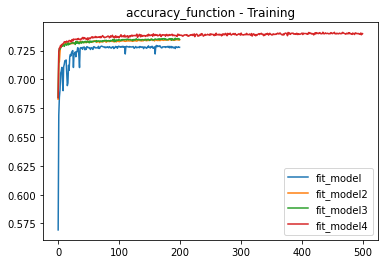

In [50]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.plot(fit_model3.history["accuracy"])
plt.plot(fit_model4.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2", "fit_model3", "fit_model4"])
plt.show()

### 5th trial with Data Preprocessing

In [51]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [52]:
application_df.count()

EIN                       34299
NAME                      34299
APPLICATION_TYPE          34299
AFFILIATION               34299
CLASSIFICATION            34299
USE_CASE                  34299
ORGANIZATION              34299
STATUS                    34299
INCOME_AMT                34299
SPECIAL_CONSIDERATIONS    34299
ASK_AMT                   34299
IS_SUCCESSFUL             34299
dtype: int64

In [53]:
# Data Preprocessing
# Establish the ASK_AMT bins and group names.
ASK_AMT_bins = [0, 5e+03, 1e+04, 5e+04, 1e+05, 5e+05, 1e+06, 5e+06, 1e+07, 5e+07, 1e+10]
application_askATM_df.groupby(pd.cut(application_askATM_df, ASK_AMT_bins)).count()

# Creat the ASK_AMT bins
group_names = ["0-5e+03", "5001-1e+04", "10001-5e+04", "50001-5e+05", "100001-5e+05","500001-1e+06", "1000001-5e+06", "5000001-1e+07", "10000001-5e+07",  ">=5000001" ]
# Categorize spending based on the ASK_AMT bins.
application_df["ASK_AMT_Ranges"] = pd.cut(application_askATM_df, ASK_AMT_bins, labels=group_names)
# Drop 'ASK_AMT' column
application_df = application_df.drop(["ASK_AMT"],1)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_Ranges
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0-5e+03
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100001-5e+05
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0-5e+03
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5001-1e+04
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100001-5e+05


In [54]:
application_df['ASK_AMT_Ranges'] = application_df['ASK_AMT_Ranges'].astype('str')
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
ASK_AMT_Ranges            object
dtype: object

In [55]:
APPLICATION_TYPE_count=application_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [56]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applType_count[applType_count < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [57]:
CLASSIFICATION_count=application_df.CLASSIFICATION.value_counts()
CLASSIFICATION_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2570        1
C1820        1
C2150        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [58]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classific_count[classific_count < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [59]:
AFFILIATION_count=application_df.AFFILIATION.value_counts()
AFFILIATION_count

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [62]:
# Determine which values to replace if counts are less than ..?
replace_AFFILIATION = list(AFFILIATION_count[AFFILIATION_count < 100].index)

# Replace in dataframe
for aff in replace_AFFILIATION :
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [63]:
USE_CASE_count=application_df.USE_CASE.value_counts()
USE_CASE_count

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [64]:
# Determine which values to replace if counts are less than ..?
replace_USE_CASE = list(USE_CASE_count[USE_CASE_count < 500].index)

# Replace in dataframe
for ucase in replace_USE_CASE :
    application_df.USE_CASE = application_df.USE_CASE.replace(ucase,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [65]:
ORGANIZATION_count=application_df.ORGANIZATION.value_counts()
ORGANIZATION_count

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [66]:
# Determine which values to replace if counts are less than ..?
replace_ORGANIZATION = list(ORGANIZATION_count[ORGANIZATION_count < 500].index)

# Replace in dataframe
for org in replace_ORGANIZATION :
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(org,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [67]:
INCOME_AMT_count=application_df.INCOME_AMT.value_counts()
INCOME_AMT_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [68]:
ASK_AMT_Ranges_count=application_df.ASK_AMT_Ranges.value_counts()
ASK_AMT_Ranges_count

0-5e+03           25398
10001-5e+04        2398
100001-5e+05       2304
50001-5e+05        1423
1000001-5e+06       940
500001-1e+06        650
5001-1e+04          549
10000001-5e+07      258
5000001-1e+07       225
>=5000001           154
Name: ASK_AMT_Ranges, dtype: int64

In [69]:
# Determine which values to replace if counts are less than ..?
replace_ASK_AMT_Ranges = list(ASK_AMT_Ranges_count[ASK_AMT_Ranges_count > 5000].index)

# Replace in dataframe
for atr in replace_ASK_AMT_Ranges:
    application_df.ASK_AMT_Ranges = application_df.ASK_AMT_Ranges.replace(atr,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT_Ranges.value_counts()

Other             25398
10001-5e+04        2398
100001-5e+05       2304
50001-5e+05        1423
1000001-5e+06       940
500001-1e+06        650
5001-1e+04          549
10000001-5e+07      258
5000001-1e+07       225
>=5000001           154
Name: ASK_AMT_Ranges, dtype: int64

In [70]:
SPECIAL_CONSIDERATIONS_count=application_df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_count

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [71]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
# Drop the non-beneficial ID columns, 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(["SPECIAL_CONSIDERATIONS"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,IS_SUCCESSFUL,ASK_AMT_Ranges
0,T10,Independent,C1000,ProductDev,Association,1,0,1,Other
1,T3,Independent,C2000,Preservation,Other,1,1-9999,1,100001-5e+05
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,Other
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,1,5001-1e+04
4,T3,Independent,C1000,Other,Trust,1,100000-499999,1,100001-5e+05


In [72]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE    10
AFFILIATION          3
CLASSIFICATION      12
USE_CASE             3
ORGANIZATION         3
INCOME_AMT           9
ASK_AMT_Ranges      10
dtype: int64

In [73]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ASK_AMT_Ranges_10000001-5e+07,ASK_AMT_Ranges_1000001-5e+06,ASK_AMT_Ranges_100001-5e+05,ASK_AMT_Ranges_10001-5e+04,ASK_AMT_Ranges_5000001-1e+07,ASK_AMT_Ranges_500001-1e+06,ASK_AMT_Ranges_50001-5e+05,ASK_AMT_Ranges_5001-1e+04,ASK_AMT_Ranges_>=5000001,ASK_AMT_Ranges_Other
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [75]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                624       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model5 = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])



Epoch 1/500
804/804 [==============================] - 1s 974us/step - loss: 0.6428 - accuracy: 0.6404
Epoch 2/500
804/804 [==============================] - 1s 992us/step - loss: 0.5631 - accuracy: 0.7244
Epoch 3/500
804/804 [==============================] - 1s 897us/step - loss: 0.5563 - accuracy: 0.7261
Epoch 4/500
804/804 [==============================] - 1s 997us/step - loss: 0.5519 - accuracy: 0.7286
Epoch 5/500
772/804 [===========================>..] - ETA: 0s - loss: 0.5552 - accuracy: 0.7254
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7254
Epoch 6/500
804/804 [==============================] - 1s 928us/step - loss: 0.5522 - accuracy: 0.7273
Epoch 7/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7281
Epoch 8/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7303
Epoch 9/500
804/804 [===================

804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7382
Epoch 65/500
510/804 [==================>...........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7340
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5413 - accuracy: 0.7349
Epoch 66/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.7353
Epoch 67/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5415 - accuracy: 0.7322
Epoch 68/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7366
Epoch 69/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7371
Epoch 70/500
519/804 [==================>...........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7378
Epoch 00070: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7370
Epoch 71/500
80

804/804 [==============================] - 1s 977us/step - loss: 0.5352 - accuracy: 0.7366
Epoch 127/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7385
Epoch 128/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7406
Epoch 129/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7368
Epoch 130/500
269/804 [=========>....................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7411
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7394
Epoch 131/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7368
Epoch 132/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7405
Epoch 133/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7412
Epoch 134/500
804/804 [======================

804/804 [==============================] - 1s 847us/step - loss: 0.5301 - accuracy: 0.7430
Epoch 189/500
804/804 [==============================] - 1s 952us/step - loss: 0.5295 - accuracy: 0.7443
Epoch 190/500
  1/804 [..............................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7188
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5382 - accuracy: 0.7337
Epoch 191/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7321
Epoch 192/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7403
Epoch 193/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7360
Epoch 194/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7405
Epoch 195/500
  1/804 [..............................] - ETA: 1s - loss: 0.4247 - accuracy: 0.8438
Epoch 00195: saving model to checkpoints\weight

804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7364
Epoch 250/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7376
Epoch 251/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7363
Epoch 252/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7352
Epoch 253/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7357
Epoch 254/500
569/804 [====================>.........] - ETA: 0s - loss: 0.5288 - accuracy: 0.7447
Epoch 00254: saving model to checkpoints\weights.254.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7427
Epoch 255/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7389
Epoch 256/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7423
Epoch 257/500
804/804 [========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7391
Epoch 311/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7353
Epoch 312/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5327 - accuracy: 0.7411
Epoch 313/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7373
Epoch 314/500
348/804 [===========>..................] - ETA: 0s - loss: 0.5289 - accuracy: 0.7448
Epoch 00314: saving model to checkpoints\weights.314.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7419
Epoch 315/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7381
Epoch 316/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7413
Epoch 317/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7380
Epoch 318/500
804/804 [========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7396
Epoch 373/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7388
Epoch 374/500
 89/804 [==>...........................] - ETA: 0s - loss: 0.5540 - accuracy: 0.7227
Epoch 00374: saving model to checkpoints\weights.374.hdf5
804/804 [==============================] - 1s 892us/step - loss: 0.5368 - accuracy: 0.7359
Epoch 375/500
804/804 [==============================] - 1s 930us/step - loss: 0.5337 - accuracy: 0.7400
Epoch 376/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7410
Epoch 377/500
804/804 [==============================] - 1s 986us/step - loss: 0.5336 - accuracy: 0.7404
Epoch 378/500
804/804 [==============================] - 1s 826us/step - loss: 0.5371 - accuracy: 0.7368
Epoch 379/500
 76/804 [=>............................] - ETA: 0s - loss: 0.5434 - accuracy: 0.7370
Epoch 00379: saving model to checkpoints\we

629/804 [======================>.......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7357
Epoch 00433: saving model to checkpoints\weights.433.hdf5
804/804 [==============================] - 1s 759us/step - loss: 0.5345 - accuracy: 0.7367
Epoch 434/500
804/804 [==============================] - 1s 739us/step - loss: 0.5328 - accuracy: 0.7404
Epoch 435/500
804/804 [==============================] - 1s 740us/step - loss: 0.5342 - accuracy: 0.7380
Epoch 436/500
804/804 [==============================] - 1s 728us/step - loss: 0.5310 - accuracy: 0.7407
Epoch 437/500
804/804 [==============================] - 1s 754us/step - loss: 0.5330 - accuracy: 0.7395
Epoch 438/500
616/804 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7415
Epoch 00438: saving model to checkpoints\weights.438.hdf5
804/804 [==============================] - 1s 770us/step - loss: 0.5309 - accuracy: 0.7409
Epoch 439/500
804/804 [==============================] - 1s 787us/step - loss: 0.5293 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7424
Epoch 494/500
804/804 [==============================] - 1s 992us/step - loss: 0.5323 - accuracy: 0.7393
Epoch 495/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7432
Epoch 496/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7456
Epoch 497/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7382
Epoch 498/500
389/804 [=============>................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7318
Epoch 00498: saving model to checkpoints\weights.498.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7350
Epoch 499/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7390
Epoch 500/500
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7389


In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5475 - accuracy: 0.7354
Loss: 0.5475177764892578, Accuracy: 0.7353935837745667


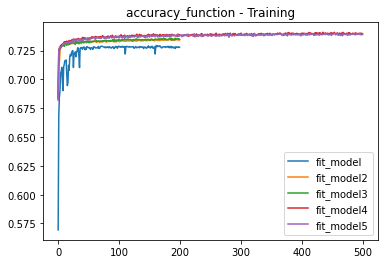

In [80]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.plot(fit_model3.history["accuracy"])
plt.plot(fit_model4.history["accuracy"])
plt.plot(fit_model5.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2", "fit_model3", "fit_model4", "fit_model5"])
plt.show()